In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [11]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
new_data = data.drop(['id', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], 1)
new_data.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [7]:
new_data['name'].fillna('Name not provided', inplace = True)
new_data.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:>

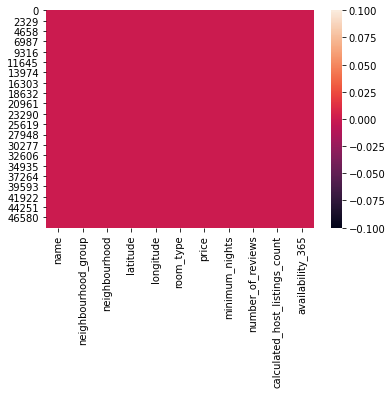

In [8]:
sns.heatmap(new_data.isnull())

In [10]:
new_data.shape

(48895, 11)

In [12]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
new_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [21]:
spec_df = new_data.loc[new_data['neighbourhood_group'] == 'Brooklyn']
spec_df = spec_df[spec_df.price != 0]

In [28]:
spec_df = spec_df.loc[spec_df['room_type'] == 'Private room']

In [29]:
spec_df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,3,314
21,CBG CtyBGd HelpsHaiti rm#1:1-4,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,6,347
22,CBG Helps Haiti Room#2.5,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,6,364


In [38]:
spec_df.neighbourhood.unique()

array(['Kensington', 'Bedford-Stuyvesant', 'South Slope', 'Park Slope',
       'Windsor Terrace', 'Flatbush', 'Fort Greene', 'Williamsburg',
       'Clinton Hill', 'Bushwick', 'Prospect-Lefferts Gardens',
       'Flatlands', 'Prospect Heights', 'DUMBO', 'Crown Heights',
       'Greenpoint', 'Brooklyn Heights', 'Brighton Beach', 'Cobble Hill',
       'Cypress Hills', 'Gowanus', 'Carroll Gardens', 'Columbia St',
       'Gravesend', 'Canarsie', 'Borough Park', 'Sunset Park', 'Midwood',
       'Vinegar Hill', 'East Flatbush', 'East New York', 'Boerum Hill',
       'Bay Ridge', 'Bensonhurst', 'Red Hook', 'Downtown Brooklyn',
       'Sheepshead Bay', 'Fort Hamilton', 'Brownsville', 'Sea Gate',
       'Manhattan Beach', 'Coney Island', 'Bergen Beach', 'Navy Yard',
       'Bath Beach', 'Dyker Heights'], dtype=object)

In [40]:
spec_df = spec_df[spec_df.price>= 60 ]
spec_df.sort_values(by=['price'])


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23987,Brooklyn Brownstone (gray bedroom - single bed),Brooklyn,South Slope,40.66242,-73.98103,Private room,60,5,10,2,23
7359,Quiet Room with a View,Brooklyn,Bushwick,40.69987,-73.93216,Private room,60,1,0,1,0
28403,Private & Comfortable Room close to Manhattan!!,Brooklyn,Prospect-Lefferts Gardens,40.66302,-73.95155,Private room,60,2,73,3,180
39319,Large bedroom,Brooklyn,Kensington,40.63628,-73.96970,Private room,60,2,12,3,220
19243,Private Room in Williamsburg,Brooklyn,Williamsburg,40.70683,-73.94582,Private room,60,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7477,Private cozy Bedroom in Brooklyn,Brooklyn,Sunset Park,40.65137,-74.00666,Private room,2000,40,28,2,0
28727,The room boom,Brooklyn,Brighton Beach,40.58363,-73.96405,Private room,3000,1,0,1,90
43670,Beautiful private Brooklyn room with kitchenette,Brooklyn,Bedford-Stuyvesant,40.68807,-73.95426,Private room,4200,114,0,1,347
4345,NearWilliamsburg bridge 11211 BK,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,1,363


In [33]:
spec_df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
6,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,3,314
21,CBG CtyBGd HelpsHaiti rm#1:1-4,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,6,347
22,CBG Helps Haiti Room#2.5,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,6,364
